In [5]:
# Import necessary libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

In [6]:
# Download stopwords (first-time use)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/archive (4)/IMDB Dataset.csv")

In [8]:
# Display dataset info
print(df.head())
print("\nDataset Shape:", df.shape)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Shape: (50000, 2)


<ipython-input-9-b86b5aea468c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


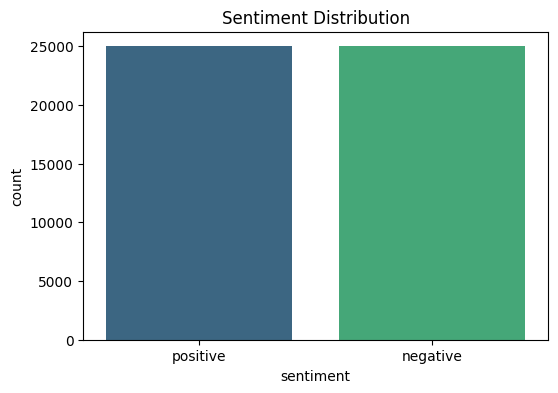

In [9]:
# Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

In [10]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    words = text.split()  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

In [11]:
# Apply preprocessing
df['clean_review'] = df['review'].apply(preprocess_text)  # Replace 'review' with actual column name


In [12]:
# Visualizing Most Common Words
all_words = ' '.join(df['clean_review'])
word_counts = Counter(all_words.split())

<ipython-input-13-5980618ff450>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


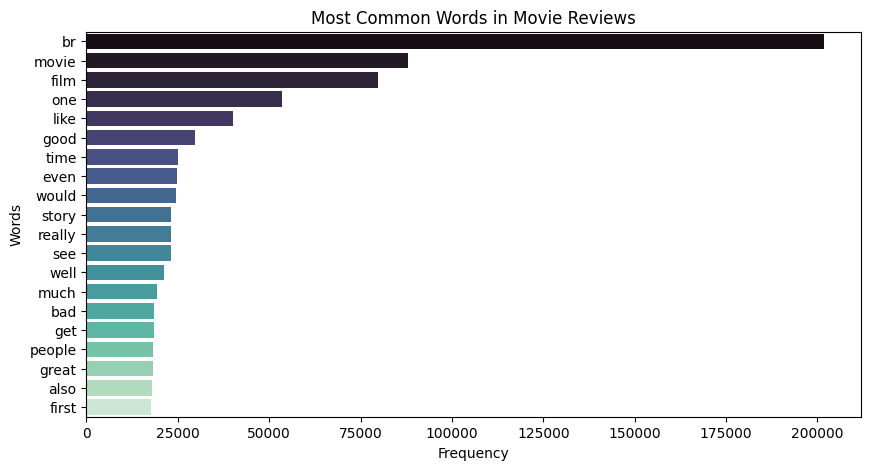

In [13]:
# Plot Most Common Words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Most Common Words in Movie Reviews")
plt.show()

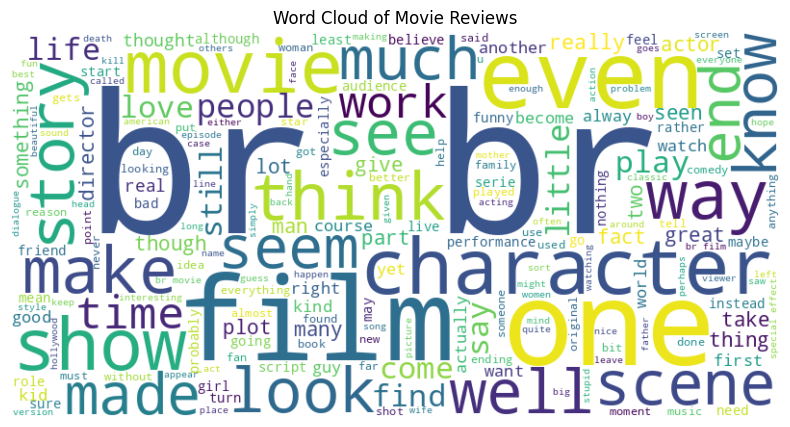

In [14]:
# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Reviews")
plt.show()

In [15]:
# Convert sentiment labels to binary (Ensure labels match dataset)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [16]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train a Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
# Predict on test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 0.8548
F1-score: 0.8565


In [21]:
# Function to predict sentiment of a new review
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_vector = vectorizer.transform([processed_review])
    prediction = model.predict(review_vector)[0]
    return "Positive" if prediction == 1 else "Negative"

In [22]:
# Example test
user_review = "The movie was absolutely amazing! I loved it."
print(f"Predicted Sentiment: {predict_sentiment(user_review)}")

Predicted Sentiment: Positive


In [23]:
import joblib  # For saving the model

# Save the trained model
joblib.dump(model, "sentiment_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
